In [1]:
import pandas as pd
import datetime as dt #for setting starting and ending dates
import numpy as np
import matplotlib.pyplot as plt #for visualisation
import scipy.stats as stats #for plots
import plotly.offline as pyo
import quandl
import yfinance as yf #for fetching real time data of stocks
import pylab
import seaborn as sns #built on top of matplotlib and is useful in providing useful interface for showing results
from datetime import datetime #for data retrival of MnC's finances
from pandas_datareader import data 

pd.options.plotting.backend='plotly'
pyo.init_notebook_mode(connected='True')

In [2]:
#Here we imported all the packages need for the analysis

In [3]:
#Setting the begining and ending dates
today=datetime.now()
year_ago=datetime(today.year-1,today.month,today.day) #starting date= one yr prior to current date

In [4]:
#Next we set the current datetime to today's and the time duration to 1year

In [13]:
MET=pd.read_csv("MET.csv")
MSFT=pd.read_csv("MSFT.csv")
AMZN=pd.read_csv("AMZN.csv")
EBAY=pd.read_csv("EBAY.csv")
NFLX=pd.read_csv("NFLX.csv")

#FIVE companies choosed for data extraction
company_list=['MET','MSFT','AMZN','EBAY','NFLX']

In [14]:
#Next, we fetch the financial data of several companies we are intrested in.
#We may also use yfinance to get real time data of stocks within the time frame (I have showed its use
#too, in the end)

In [146]:
MET.head(5)
#fIrst five rows of Metlife's finance dataset
#To see how it is structured 

Date       Open       High        Low      Close  Adj Close   Volume  \
0  2023-08-25  62.480000  62.740002  61.700001  62.410000  60.418919  2109500   
1  2023-08-28  62.500000  62.990002  62.330002  62.529999  60.535088  2134600   
2  2023-08-29  62.770000  63.139999  62.330002  62.849998  60.844883  2834700   
3  2023-08-30  63.049999  63.410000  62.770000  62.939999  60.932011  2343500   
4  2023-08-31  63.130001  63.490002  62.820000  63.340000  61.319248  4953500   

   MA: 10  MA: 20  MA: 30  Daily Returns  
0     NaN     NaN     NaN            NaN  
1     NaN     NaN     NaN       0.001923  
2     NaN     NaN     NaN       0.005118  
3     NaN     NaN     NaN       0.001432  
4     NaN     NaN     NaN       0.006355

In [147]:
#It shows the first 5 columns of the financial record of the choosenn stock, it helps us to analyze how the data is categorised and understand it's distribution.

In [18]:
MSFT.head(5)


Date        Open        High         Low       Close   Adj Close  \
0  2023-08-25  321.470001  325.359985  318.799988  322.980011  320.573730   
1  2023-08-28  325.660004  326.149994  321.720001  323.700012  321.288391   
2  2023-08-29  321.880005  328.980011  321.880005  328.410004  325.963318   
3  2023-08-30  328.670013  329.809998  326.450012  328.790009  326.340454   
4  2023-08-31  329.200012  330.910004  326.779999  327.760010  325.318176   

     Volume  
0  21684100  
1  14808500  
2  19284600  
3  15222100  
4  26411000

In [19]:
AMZN.head(5)

Date        Open        High         Low       Close   Adj Close  \
0  2023-08-25  132.470001  133.869995  130.580002  133.259995  133.259995   
1  2023-08-28  133.779999  133.949997  131.850006  133.139999  133.139999   
2  2023-08-29  133.380005  135.139999  133.250000  134.910004  134.910004   
3  2023-08-30  134.929993  135.679993  133.919998  135.070007  135.070007   
4  2023-08-31  135.059998  138.789993  135.000000  138.009995  138.009995   

     Volume  
0  44147500  
1  34108400  
2  38646100  
3  36137000  
4  58781300

In [20]:
EBAY.head(5)

Date       Open       High        Low      Close  Adj Close   Volume
0  2023-08-25  43.730000  44.349998  43.380001  43.590000  42.633911  7250700
1  2023-08-28  43.889999  44.049999  43.549999  43.869999  42.907772  4203100
2  2023-08-29  44.009998  44.700001  43.919998  44.320000  43.347900  4135100
3  2023-08-30  44.320000  44.869999  44.259998  44.750000  43.768471  3595300
4  2023-08-31  44.599998  45.340000  44.549999  44.779999  44.043861  7844400

In [21]:
NFLX.head(5)

Date        Open        High         Low       Close   Adj Close  \
0  2023-08-25  412.000000  419.250000  407.559998  416.029999  416.029999   
1  2023-08-28  418.040009  419.829987  413.269989  418.059998  418.059998   
2  2023-08-29  416.000000  432.170013  414.500000  429.989990  429.989990   
3  2023-08-30  430.850006  438.160004  428.350006  434.670013  434.670013   
4  2023-08-31  431.230011  437.149994  431.230011  433.679993  433.679993   

    Volume  
0  5390900  
1  2928600  
2  4486700  
3  3625400  
4  3803000

In [22]:
MET.info()
#column datatypes, data stored in dataframe, gives a brief summary of the insights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [23]:
#info() gives us more insights into the dataset, its dimensions, its class, number of entries etc

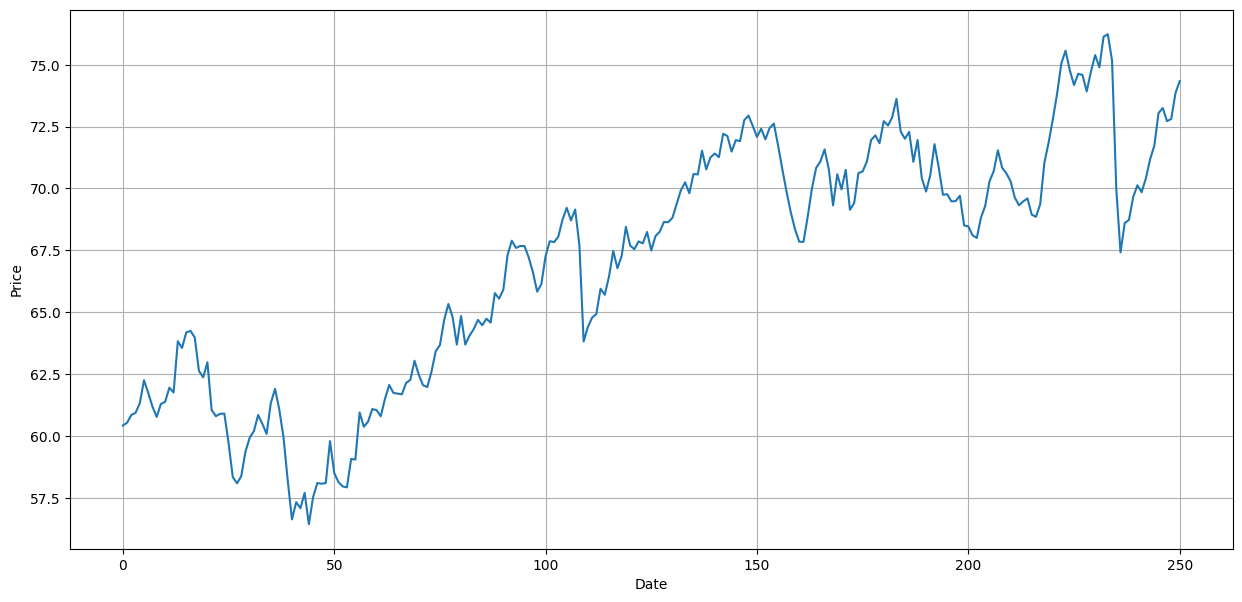

In [29]:
plt.figure(figsize=(15,7))
plt.plot(MET['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [30]:
#Here our main focus is on "Adjusted Close" section of the data, it means the cash value of the last transacted price before the market closes. The adjusted closing price is attributed to anything that would affect the stock price after the market closes for the day. 

In [31]:
print('First',MET.Close[0],'End', MET.Close[250]) 
#Here we can see how the prices varied, intial vs closing

First 62.41 End 74.339996


In [32]:
#Above is the starting and ending price of the asset choosen within the timeframe

In [33]:
# We can also compute log returns as its time additive
log_returns=np.log(MET.Close/MET.Close.shift(1)).dropna() #we also dropped the nans 
log_returns

1      0.001921
2      0.005104
3      0.001431
4      0.006335
5      0.015043
         ...   
246    0.002734
247   -0.007262
248    0.001237
249    0.014183
250    0.006613
Name: Close, Length: 250, dtype: float64

In [34]:
log_returns.mean() #take the mean of log_Rreturns

np.float64(0.0006996943684652846)

In [35]:
MET.Close[0]*(np.exp(log_returns.mean()*len(log_returns)))

np.float64(74.33999600000011)

In [36]:
result = float(MET.Close[0] * np.exp(log_returns.mean() * len(log_returns)))
print(result)


74.33999600000011


In [37]:
#Above, we find the closing price of METlife using log returns.

In [38]:
#As we can see it accurately predicted the closing price of the time series. It can't be done by simple returns as if we want to model returns using the normal distribution!

#Simple Returns: The product of normally distributed variables is not normally distributed.
#Log Returns: The sum of normally distributed variables folllow a normal distribution.

In [39]:
# Lets try to calculate the same using simple returns and see how it compares
simple_returns=MET.Close.pct_change().dropna() # we also dropped the NaNs using dropna()
simple_returns

1      0.001923
2      0.005118
3      0.001432
4      0.006355
5      0.015156
         ...   
246    0.002738
247   -0.007235
248    0.001238
249    0.014284
250    0.006635
Name: Close, Length: 250, dtype: float64

In [41]:
float(simple_returns.mean()) # calculate the mean of simple_returns

0.0007798045884556673

In [42]:
MET.Close[0]*(np.prod([(1+Rt) for Rt in simple_returns]))

np.float64(74.33999600000018)

In [43]:
float(MET.Close[0]*(np.prod([(1+Rt) for Rt in simple_returns])))

74.33999600000018

In [44]:
#Above, we find the closing price of twitter using simple returns.

In [45]:
#As we see by simple returns the prediction is close to the actually closing price but not accurately close, also its very non-intutive to follow through

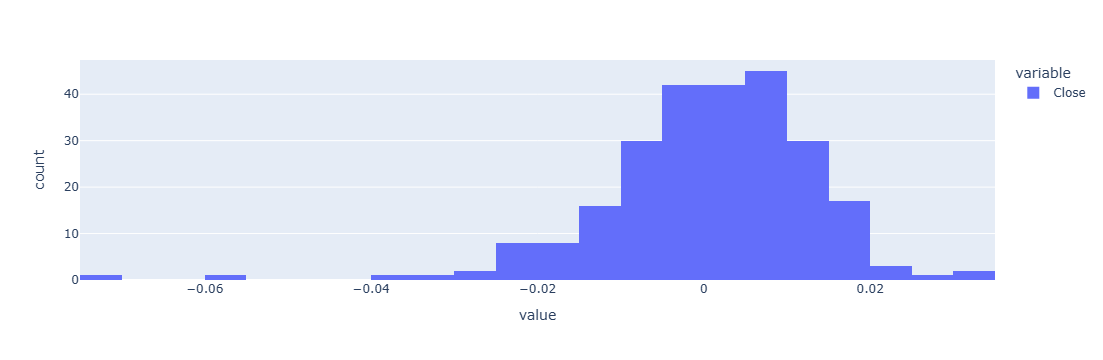

In [46]:
#Histogram of log returns
log_returns.plot(kind='hist')

In [47]:
#As we can see it's mostly centered around 0, looks a bit normally distributed. But there is quite a catch here is normality a good assumption for financial data? The assumption that prices or more accurately log returns are normally distributed.

In [48]:
# lets take the best and the worst case and see the std deviation and the probability of occurances if its assumed to be normal
log_returns_sorted=log_returns.tolist()
log_returns_sorted.sort()
# Here we sorted all the log returns according to their value,
# to get the lowest and the highest case (the leftmost and the Rightmost case in the Histogram)

worst=log_returns_sorted[0]
best=log_returns_sorted[-1]

std_worst=(worst-log_returns.mean())/log_returns.std()
std_best=(best-log_returns.mean())/log_returns.std()
# here we normalise it

print('Std dev. worst %.2f best %.2f' %(std_worst,std_best))

Std dev. worst -5.68 best 2.54


In [49]:
#As we can see the deviation is huge, as in normal distribution about 99.75% of the data is within 3 standard deviations, which is just not the case here.

In [50]:
#Testing for normality

In [51]:
#Q-Q or Quantile-Quantile Plots

#It plots two sets of quantiles against one another i.e. theoritical quantiles against actual quantiles of the variable.


Q-Q PLOT


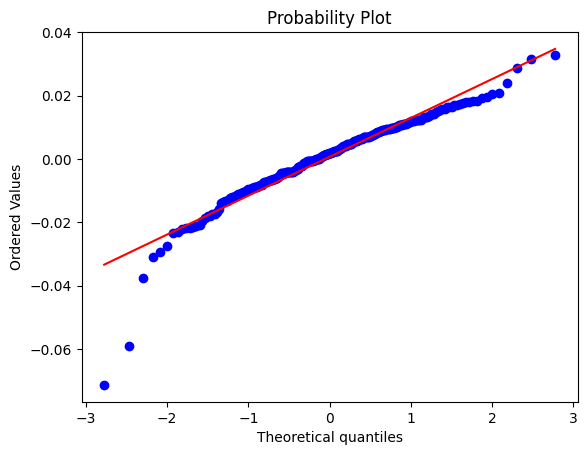

In [52]:
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q PLOT')

In [53]:
#As we can see from here normally treating financial data as normally distributed is not a bad assumption for the most part, except for the tails. Which we can see from the plot as well, at the tails and heads there seems a deviation from normality.

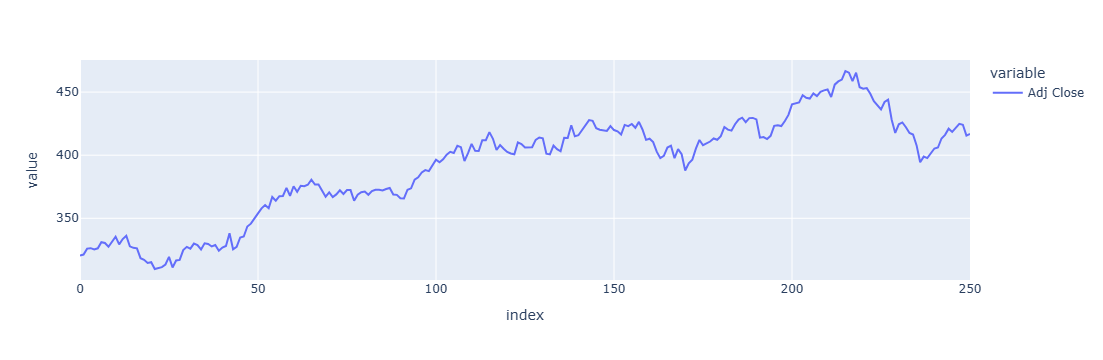

In [55]:
MSFT['Adj Close'].plot()

In [56]:
#We do the same for other assets as well, it would help us to annalyse how it is varrying wrt days

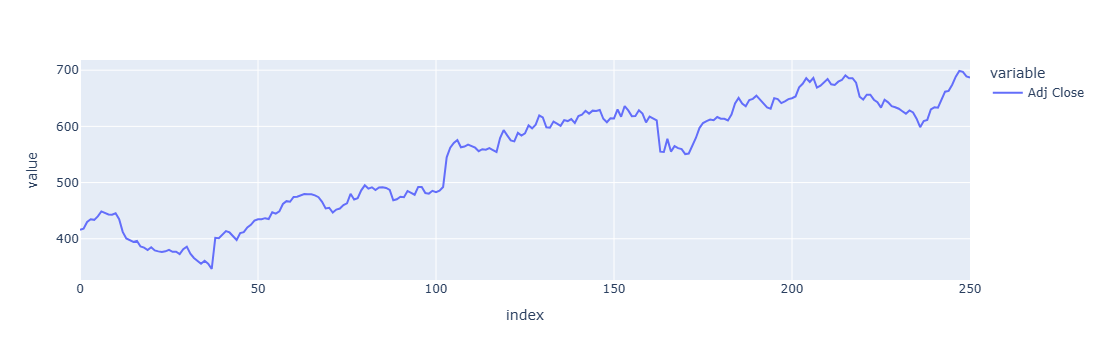

In [58]:
NFLX['Adj Close'].plot()

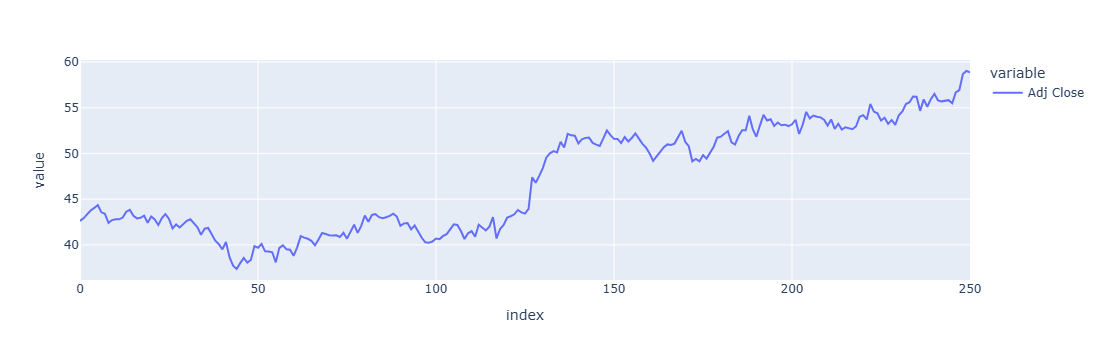

In [60]:
EBAY['Adj Close'].plot()

In [61]:
#We then incorporate moving averages to eliminate fluctuations and this process is called smoothing of time series. It reduces the amount of variations present in the data. The main advantage of SMA is that it offers a smoothed line, less prone to whipsawing. Its often favoured by traders operating on longer time frames such as daily or weekly charts

In [64]:
#Number of days for which moving average will be calculated
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    MET[ma_str] = MET['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()
    NFLX[ma_str] = NFLX['Adj Close'].rolling(ma).mean()
    EBAY[ma_str] = EBAY['Adj Close'].rolling(ma).mean()

In [65]:
#This code calculates the moving averages (MA) for a given set of days (10, 20, and 30) for the 'Adj Close' price data

In [69]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

In [70]:
#For a specified company's stock market data, the code defines a function called plot_graphic, which creates a graph illustrating the adjusted closing prices and three moving averages (MA: 10, MA: 20, and MA: 30). The function takes two parameters: company, which represents the data for the company, and company_string, which represents the company's name.


#An effective way to visualize adjusted closing prices and moving averages of a specific company's stock market data is to use the plot_graphic function. Over time, it makes it easier to analyze and compare price trends.

#The more days we incorporate the more smoothing we get, which can be seen in the graph below.

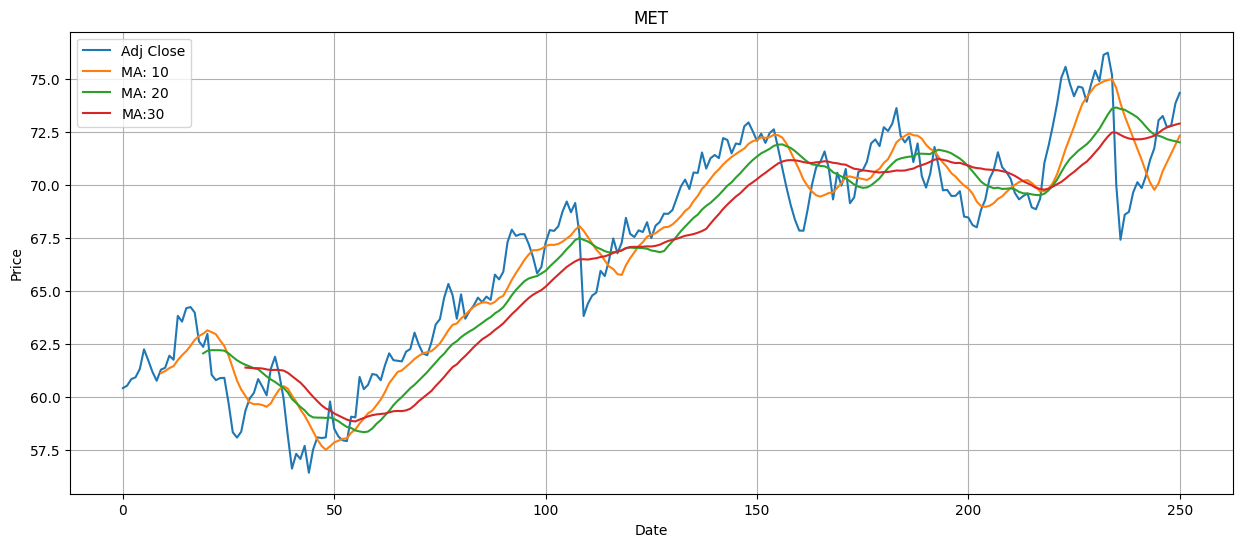

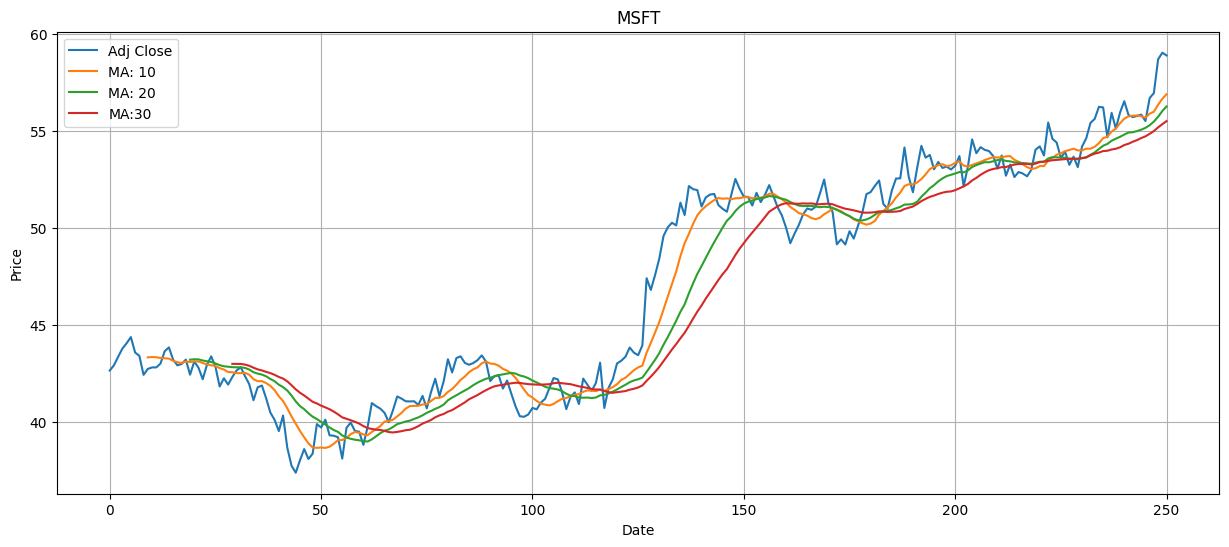

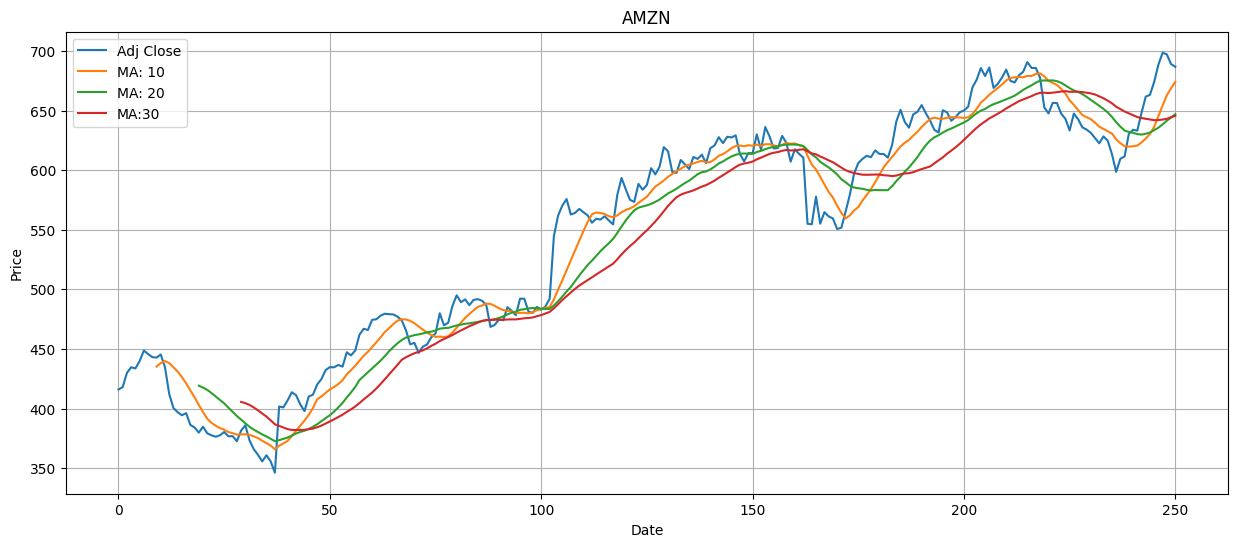

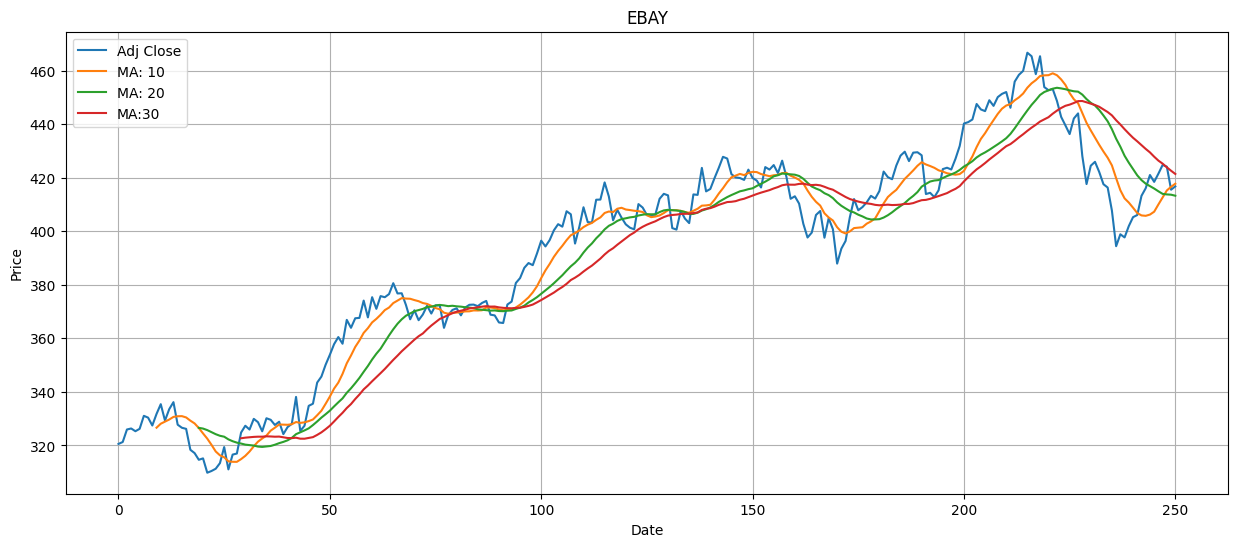

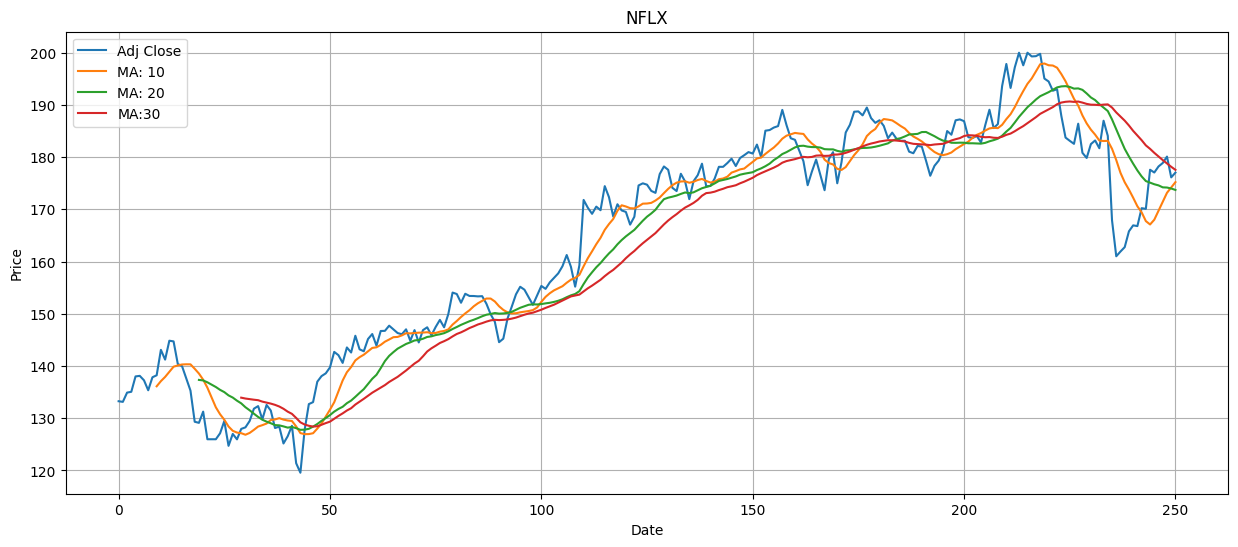

In [71]:
data_list = [MET, EBAY,NFLX, MSFT, AMZN]

for i in range(len(data_list)):   
    plot_graphic(data_list[i], company_list[i])

In [72]:
#Data sets for different companies are iterated through in the data_list. A plot_graphic function is invoked for each data set, with the corresponding company data and name provided as input. As a result, distinct graphs are created for each company, which allow visualization of their adjusted closing prices and moving averages.

#As u can see the red line gives more smoothening over blue line, which gives more smoothening over green line.

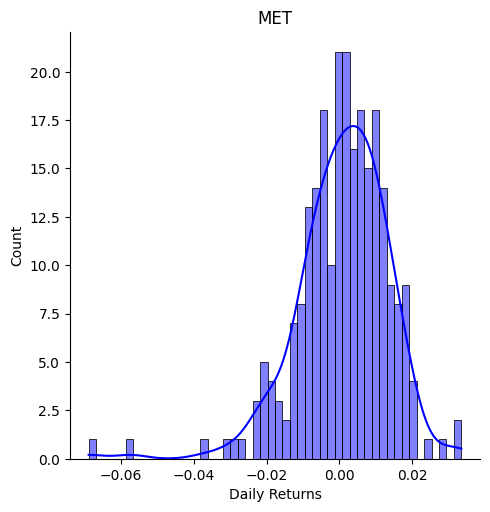

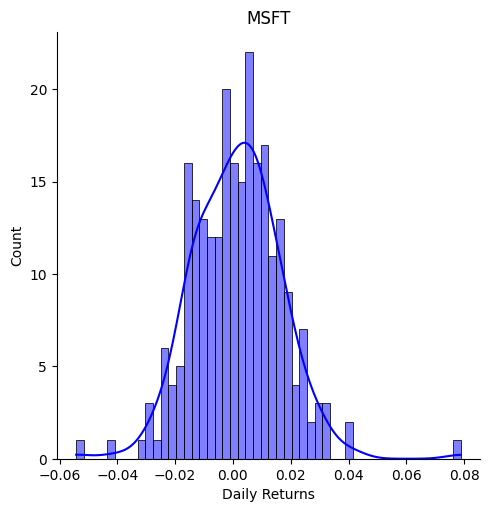

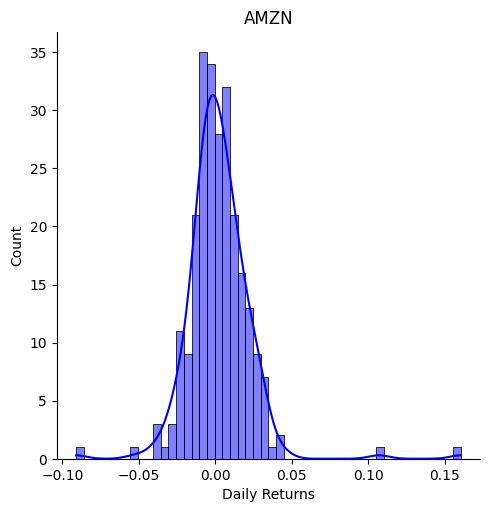

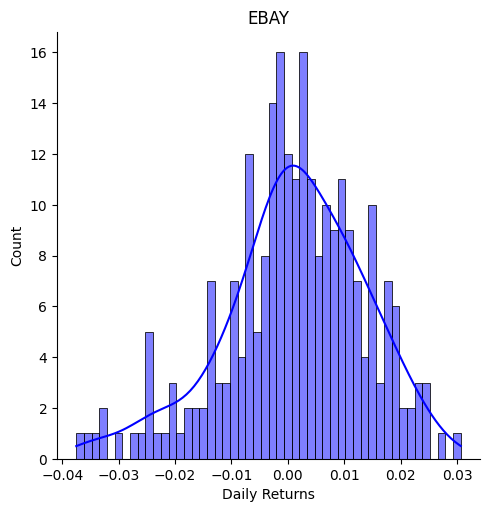

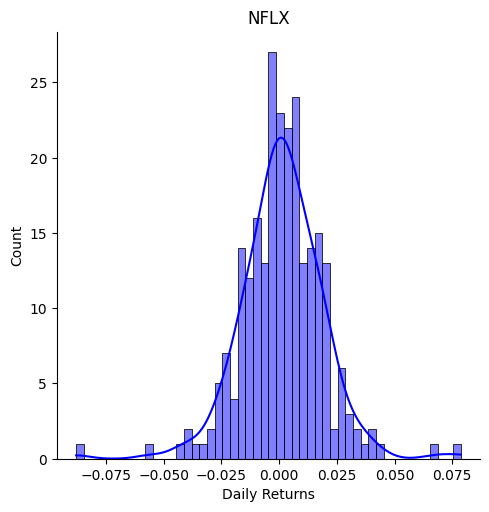

In [75]:
# Calculate returns and draw distribution

for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

In [76]:
#This code snippet calculates the daily returns for each company within the data_list and visualizes the distribution of these returns using a histogram.

#On observing we see it follows almost a normal distribution, we say “almost” as the head and tail parts of the histogram (upon which we did smoothening to arrive at this conclusion) don’t follow Gaussian distribution very strictly (why? And how can we say this? I have explained this in my talk of normality section).

#And the smoothening has been achieved due to the usage of moving average, as histogram itself is a discrete distribution and in order to achieve a continuous distribution moving average provides a good means for visualization.

In [77]:
import pandas as pd

# Assuming data_list is a list of dictionaries with 'Daily Returns' as a key and the values are pandas Series
daily_returns_list = [data['Daily Returns'] for data in data_list]

# Concatenate the daily return series along the columns axis
stock_returns = pd.concat(daily_returns_list, axis=1)

# Set the columns names to match the company_list
stock_returns.columns = company_list

# Display the first few rows of the resulting DataFrame
stock_returns.head()

MET      MSFT      AMZN      EBAY      NFLX
0       NaN       NaN       NaN       NaN       NaN
1  0.001923  0.006424  0.004879  0.002229 -0.000900
2  0.005118  0.010258  0.028537  0.014551  0.013294
3  0.001432  0.009702  0.010884  0.001157  0.001186
4  0.006355  0.006292 -0.002278 -0.003133  0.021766

In [78]:
#Stock_returns is generated by concatenating the pandas Series objects from daily_returns_list along the columns axis using the pd.concat() function. A combined view of the daily returns data for all of the companies is provided by this DataFrame, in which each column represents the daily returns of a different company.

#Stock_returns.columns = company_list ensures that the column names in stock_returns align with the names of the companies. Lastly, stock_returns.head() is used to display the first few rows of the resulting DataFrame.

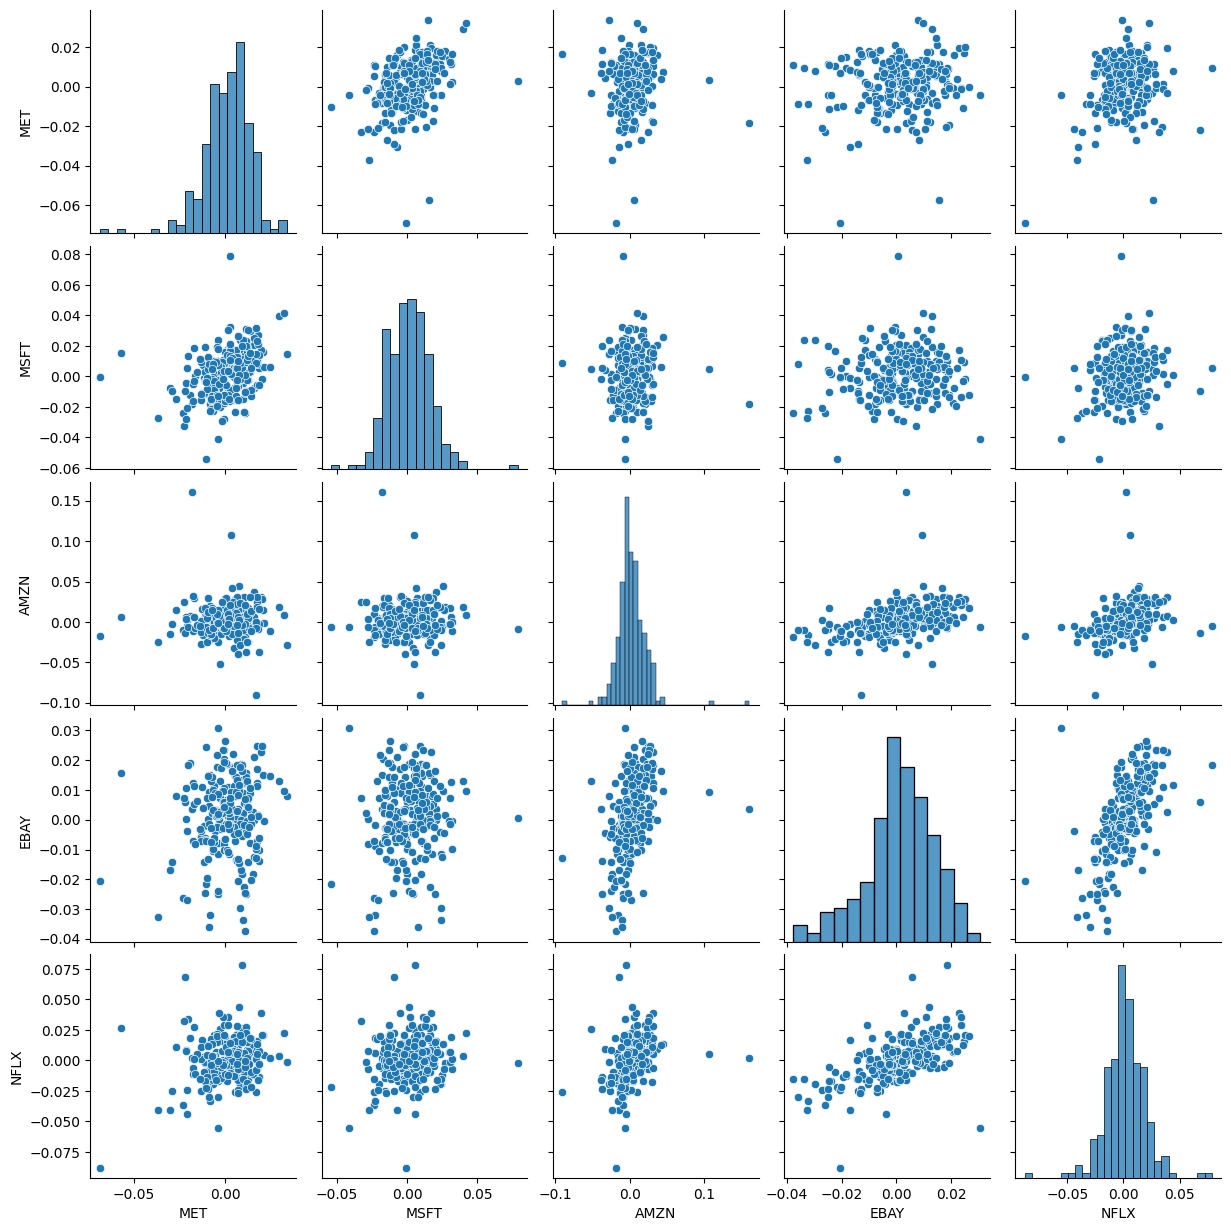

In [79]:
sns.pairplot(stock_returns.dropna())

In [80]:
#Seaborn's pairplot() function is used to create a scatter plot matrix. In this matrix, you can see how variables within the stock_returns DataFrame are related pairwise. Dropna() ensures that data for scatter plots is complete. The resulting plot can provide insight into the correlations and patterns between the daily returns of different companies.

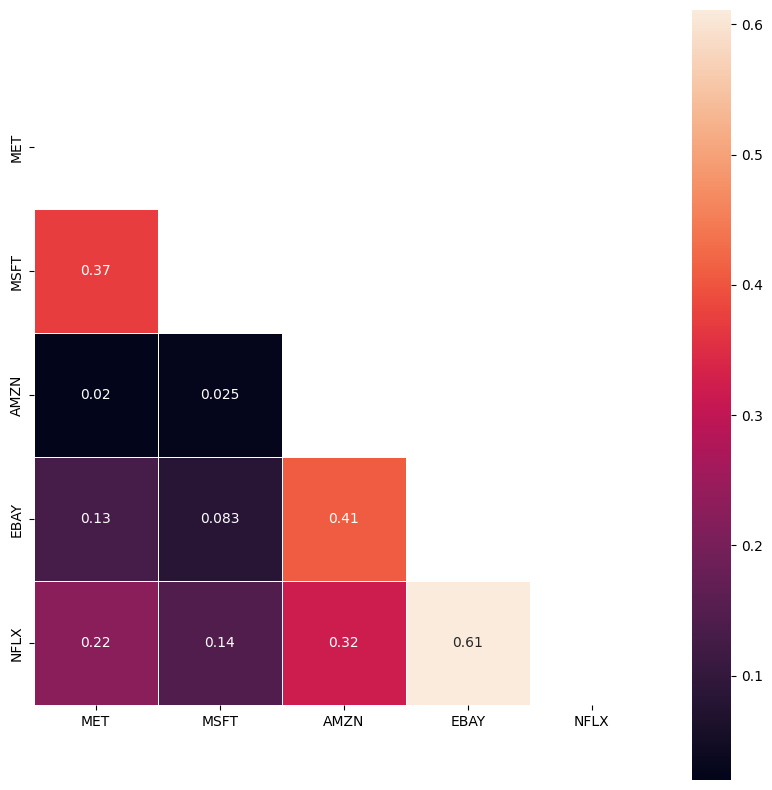

In [81]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [82]:
#A heatmap plot is generated to visualize the correlations between stock_returns and the correlation matrix created in the provided code snippet.

In [83]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

MET     0.000910
MSFT    0.001409
AMZN    0.002210
EBAY    0.001129
NFLX    0.001296
dtype: float64
           MET      MSFT      AMZN      EBAY      NFLX
MET   0.000160  0.000072  0.000005  0.000020  0.000050
MSFT  0.000072  0.000235  0.000008  0.000016  0.000039
AMZN  0.000005  0.000008  0.000419  0.000105  0.000116
EBAY  0.000020  0.000016  0.000105  0.000157  0.000137
NFLX  0.000050  0.000039  0.000116  0.000137  0.000319


In [84]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [85]:
#randomPortfolio() is responsible for generating a random portfolio of shares.

#The randomPortfolio() function generates a random portfolio of shares by drawing random values from a standard normal distribution, exponentiating them to ensure positive values, and then normalizing them to represent proportions of the total portfolio value. By calling this function, you can obtain a random allocation of shares for a portfolio.

In [86]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [87]:
#The provided code includes two functions: IncomePortfolio(Rand) and RiskPortfolio(Rand). These functions are designed to perform calculations related to income and risk for a portfolio.

#the IncomePortfolio(Rand) function calculates the expected income of a portfolio based on the mean income values and the allocation of assets. The RiskPortfolio(Rand) function, on the other hand, calculates the risk of a portfolio based on the covariance matrix of returns and the allocation of assets. Together, these functions provide essential metrics for evaluating the income and risk characteristics of a portfolio

In [88]:
combinations = 10000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

In [89]:
#First, the variable "combinations" is initialized to 10000. This variable determines the number of portfolio combinations that will be generated and evaluated

#Next, three arrays named "risk," "income," and "portfolio" are created and initialized with zeros. These arrays will store the risk, income, and portfolio data for each combination.

#The randomly generated portfolio is then assigned to the ith row of the "portfolio" array. Each row in the "portfolio" array represents a different combination of shares.

#The "RiskPortfolio()" function is invoked, passing the current portfolio as an argument. This function calculates the risk associated with the given portfolio.The calculated risk value is assigned to the ith element of the "risk" array.

#The "IncomePortfolio()" function is called with the current portfolio as an argument. This function computes the income or expected return of the portfolio.The calculated income value is then assigned to the ith element of the "income" array.


In [90]:
#The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. o.

#The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

#The optimal risky portfolio is the one with the highest Sharpe ratio.

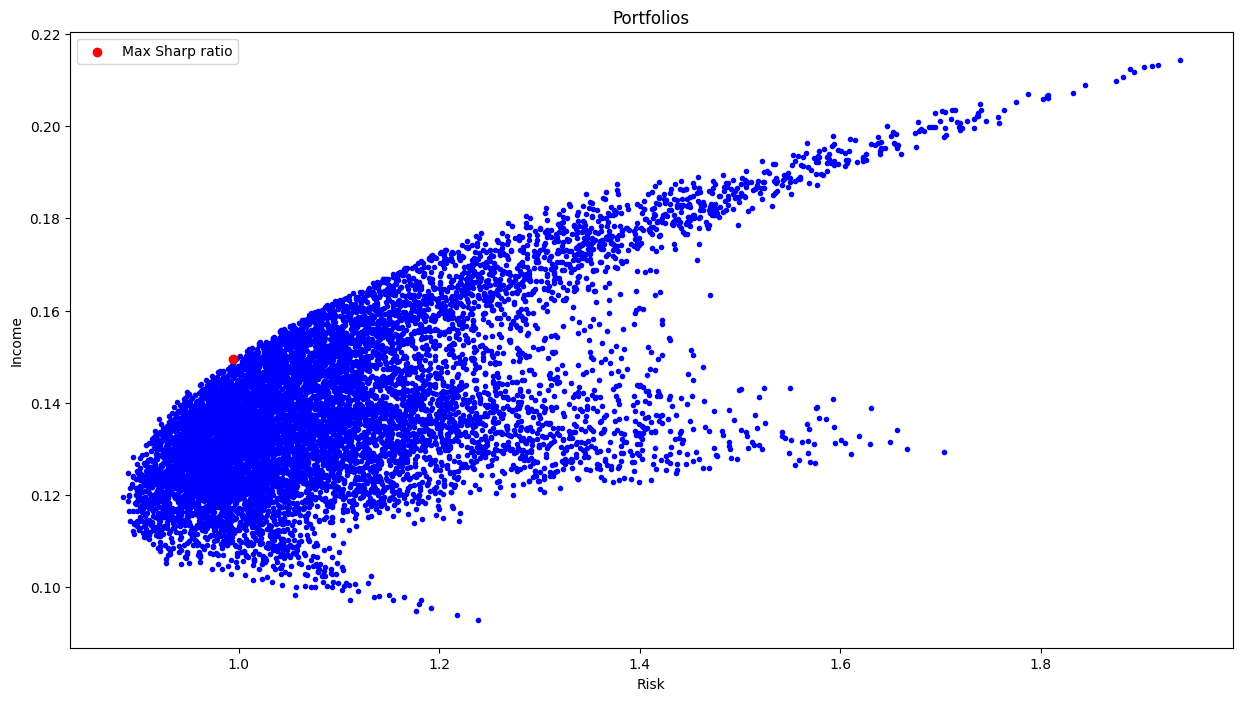

In [91]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [92]:
#The above plot generates a scatter plot where the x-axis represents the risk and the y-axis represents the income for multiple portfolios. It further highlights the portfolio with the maximum Sharpe ratio by adding a red dot at its corresponding risk and income values and including a legend to identify it.

In [93]:
#Below we find the best portfolio out of all

In [94]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

MET : 0.16581713688416738
MSFT : 0.3172337130956588
AMZN : 0.2857776493914636
EBAY : 0.20076080203409669
NFLX : 0.030410698594613428


In [95]:
#It identifies the portfolio with the highest Sharpe ratio and then displays the allocation or weight assigned to each company in that portfolio. It allows us to see how the assets or companies are distributed within the best-performing portfolio.

In [96]:
days = 365
dt = 1 / days
# here I have divided by 365 but usually we do by 252 (the number of trading days)
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [97]:
#It calculates the average daily returns (mu) and the standard deviation of daily returns (sigma) for a stock based on the available data. These values are commonly used in financial analysis and risk assessment to understand the historical performance and volatility of a stock.

In [98]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [99]:
#The provided code snippet introduces a function named monte_carlo that employs the Monte Carlo method to simulate the future price of a stock.

#The monte_carlo function uses the Monte Carlo method to generate simulated stock prices for a specified number of days. It considers the initial stock price, average daily return, and standard deviation of daily returns. The function incorporates random shocks and drift components to calculate the simulated prices for each day.

#For the generation of random paths, I have used arithmetic Brownian motion, instead of this one can use geometric Brownian motion too.

#The more the variance the more the spread is, and the less the steepness is.In context to Monte Carlo Simulation, the random paths generated would be less differentiating if the variance is less and it would be more if the variance is more resulting in a flatter curve.

IndexError: index 1000 is out of bounds for axis 0 with size 1000

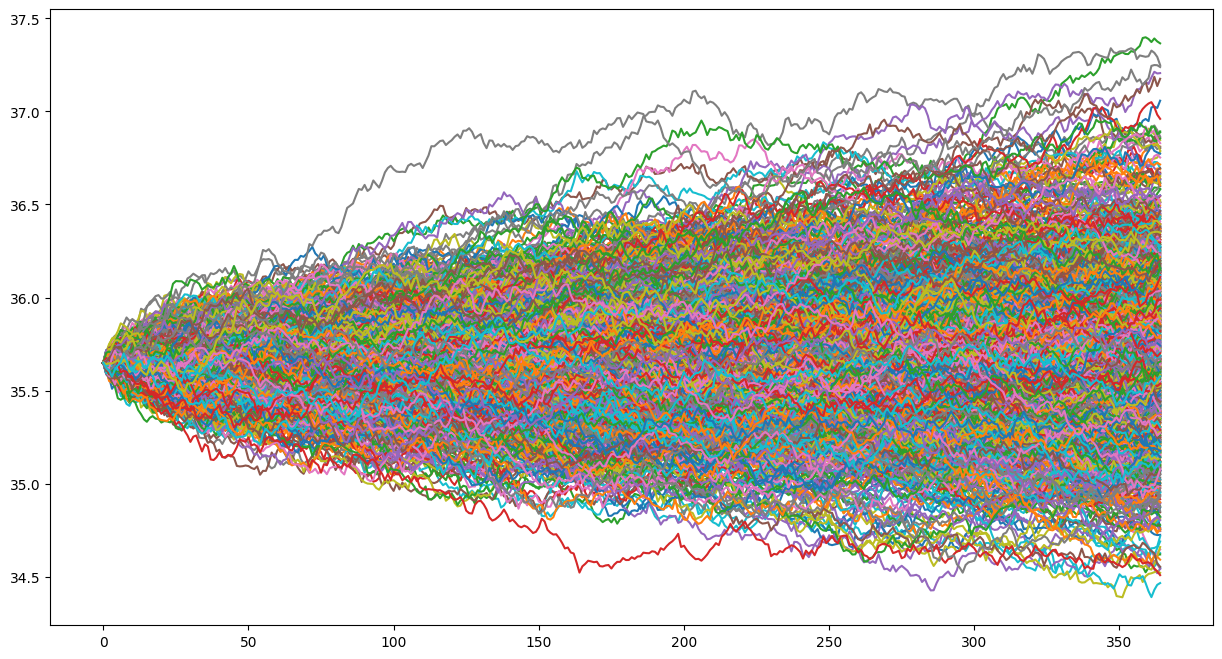

In [102]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(10000):
    result = monte_carlo(start_price, days, mu['MET'], sigma['MET'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for METLIFE')

In [103]:
#This code performs a Monte Carlo analysis of Twitter's stock by predicting its future prices through 1000 simulations. The final prices from these simulations are stored in the 'sim' array and plotted. By doing so, the code offers potential insights into the future price range of Twitter's stock, as determined by the Monte Carlo simulations.

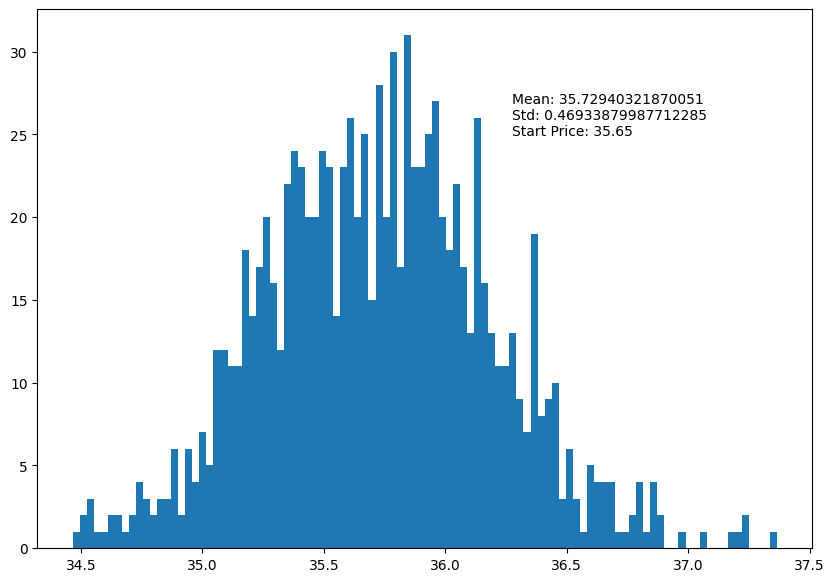

In [104]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

In [105]:
#The provided code constructs a histogram to illustrate the distribution of the Twitter stock's simulated prices derived from the Monte Carlo simulations.

Text(0.5, 1.0, 'Monte Carlo analysis for EBAY')

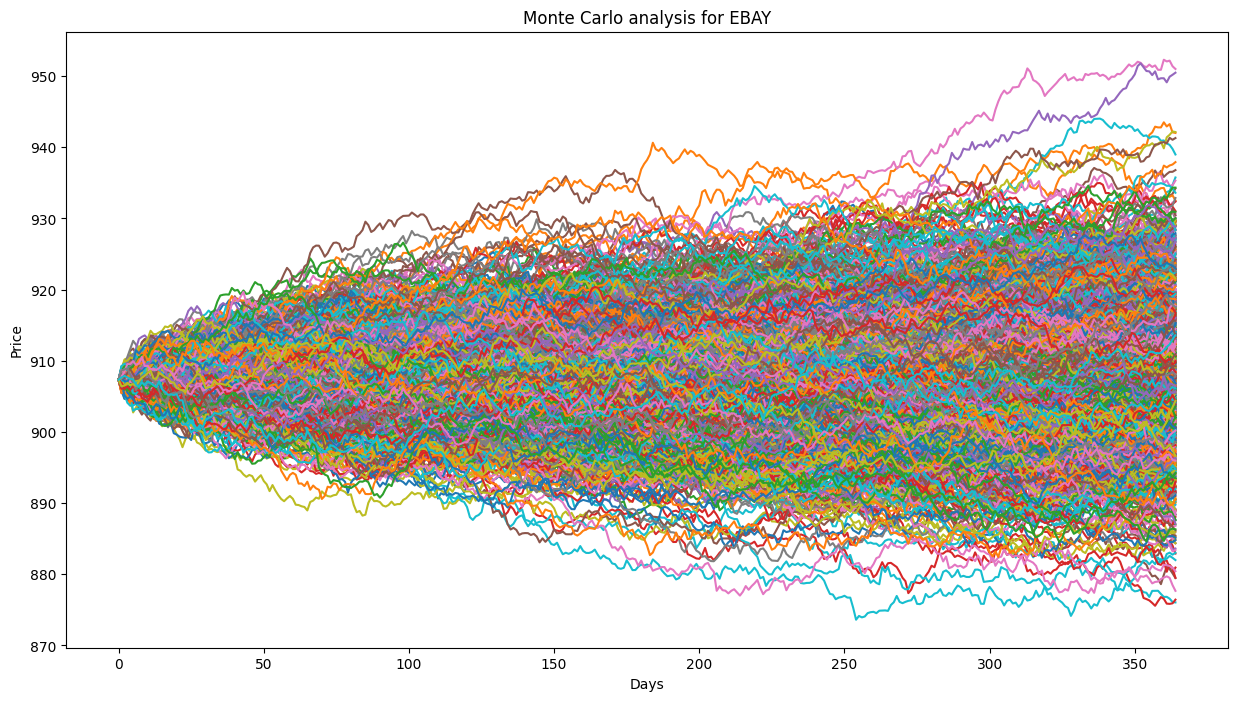

In [106]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['EBAY'], sigma['EBAY'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for EBAY')

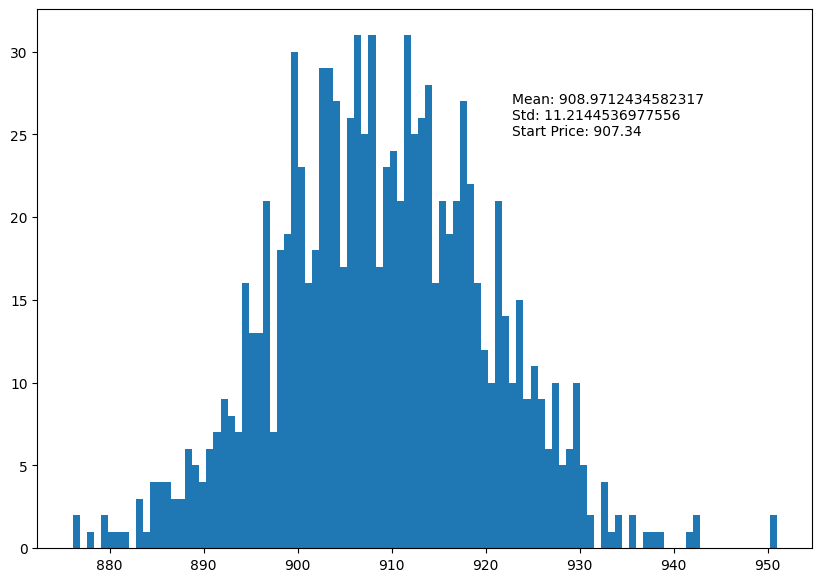

In [107]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Text(0.5, 1.0, 'Monte Carlo analysis for Microsoft')

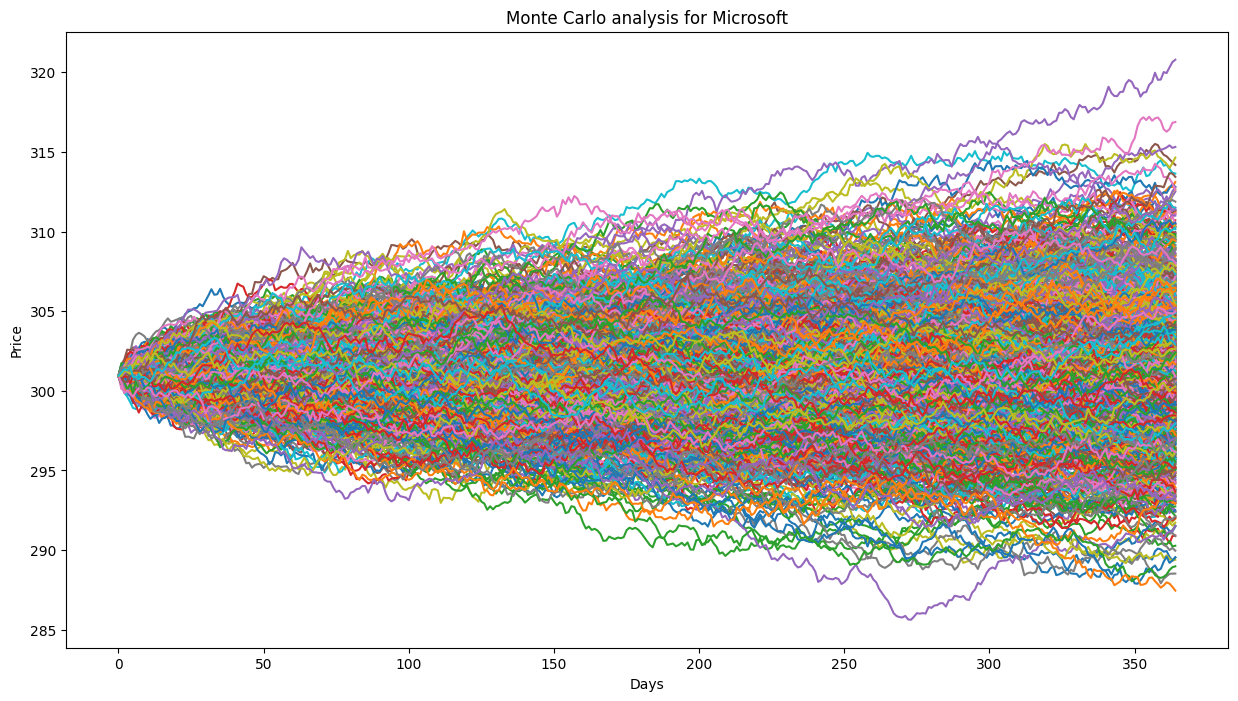

In [108]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsoft')

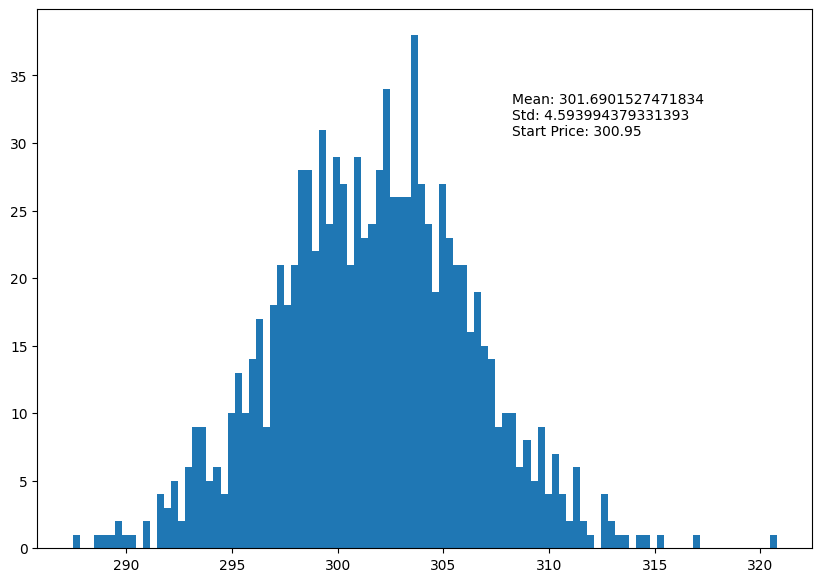

In [109]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Text(0.5, 1.0, 'Monte Carlo analysis for Amazon')

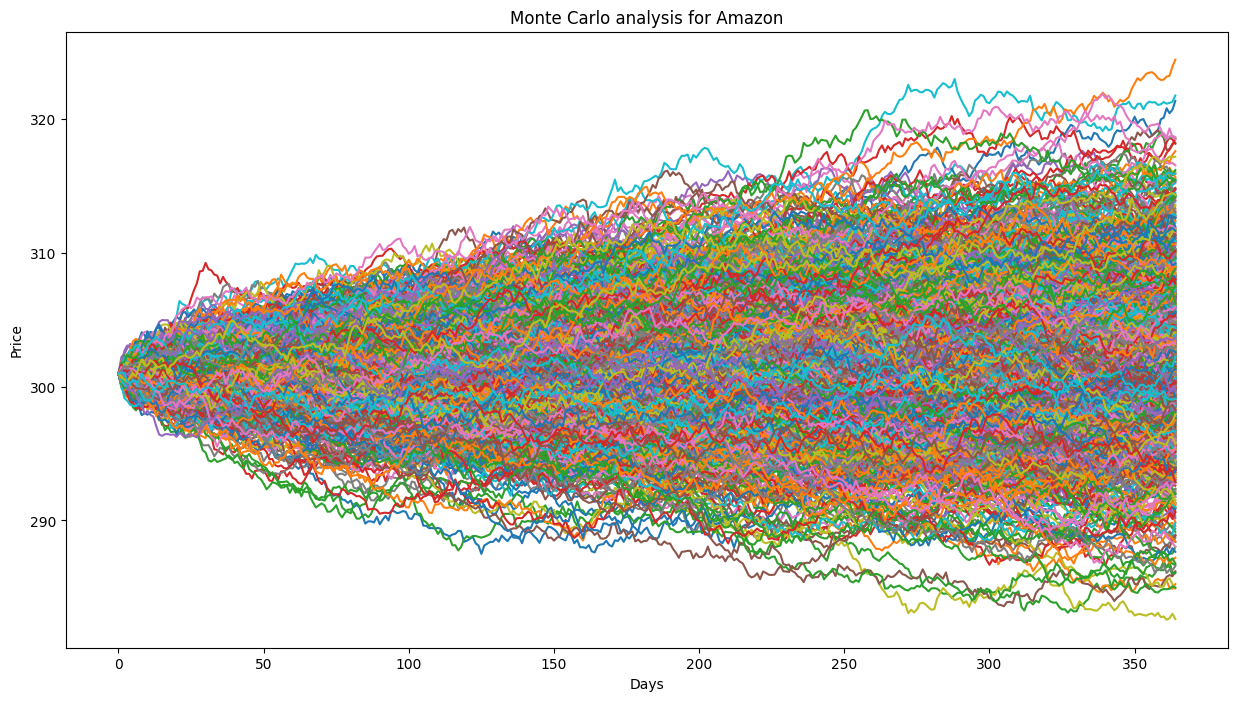

In [110]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AMZN'], sigma['AMZN'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Amazon')

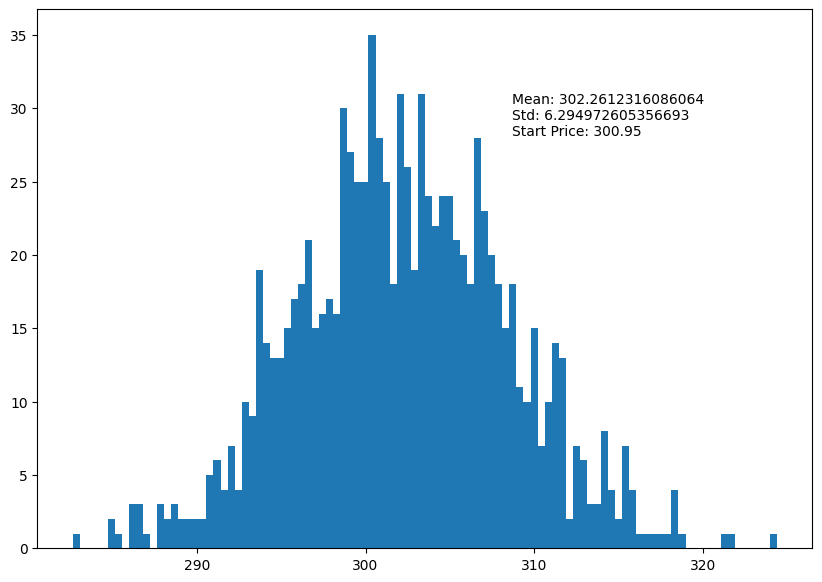

In [111]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

In [112]:
#We did the same analysis for other stocks as well, which we discussed in detail for Twitter.

In [113]:
#We can also extend this discussion to include risk factor along with it to incorporate more diversity

In [117]:
# lets import more data
df = yf.download(['AAPL', 'NKE', 'GOOGL', 'AMZN'], start='2023-08-24', end='2024-08-25')
df.head()

[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                           Close  \
Ticker            AAPL        AMZN       GOOGL         NKE        AAPL   
Date                                                                     
2023-08-24  175.482056  131.839996  129.631226   96.255745  176.380005   
2023-08-25  177.700684  133.259995  129.731110   97.448715  178.610001   
2023-08-28  179.272644  133.139999  130.859802   98.227592  180.190002   
2023-08-29  183.182617  134.910004  134.415741  100.337471  184.119995   
2023-08-30  186.694672  135.070007  135.724228  100.662827  187.649994   

Price                                                 High              ...  \
Ticker            AMZN       GOOGL         NKE        AAPL        AMZN  ...   
Date                                                                    ...   
2023-08-24  131.839996  129.779999   97.629997  181.100006  136.779999  ...   
2023-08-25  133.259995  129.880005   98.839996  179.149994  133.869995  ...   
2023-08-28  133.139999  131.009995   99.629997  180.589996  133.949997  ...   
2023-08-29  134.910004  134.570007  101.769997  184.899994  135.139999  ...   
2023-08-30  135.070007  135.880005  102.099998  187.850006  135.679993  ...   

Price              Low                    Open                          \
Ticker           GOOGL         NKE        AAPL        AMZN       GOOGL   
Date                                                                     
2023-08-24  129.570007   97.559998  180.669998  136.399994  133.949997   
2023-08-25  127.250000   97.809998  177.380005  132.470001  129.539993   
2023-08-28  130.139999   98.870003  180.089996  133.779999  131.309998   
2023-08-29  132.240005   99.720001  179.699997  133.380005  132.240005   
2023-08-30  134.070007  101.510002  184.940002  134.929993  134.779999   

Price                     Volume                                
Ticker             NKE      AAPL      AMZN     GOOGL       NKE  
Date                                                            
2023-08-24   98.699997  54945800  43646300  28500700  10310000  
2023-08-25   98.500000  51449600  44147500  26762900   7290600  
2023-08-28   99.589996  43820700  34108400  20543300   6006600  
2023-08-29  100.029999  53003900  38646100  43075600   8641600  
2023-08-30  101.639999  60813900  36137000  28315800   4822100  

[5 rows x 24 columns]

In [118]:
# Adjusted Closing price
df = df['Adj Close']
df.head()

Ticker            AAPL        AMZN       GOOGL         NKE
Date                                                      
2023-08-24  175.482056  131.839996  129.631226   96.255745
2023-08-25  177.700684  133.259995  129.731110   97.448715
2023-08-28  179.272644  133.139999  130.859802   98.227592
2023-08-29  183.182617  134.910004  134.415741  100.337471
2023-08-30  186.694672  135.070007  135.724228  100.662827

In [119]:
#To understand the columns and distribution of the dataframe

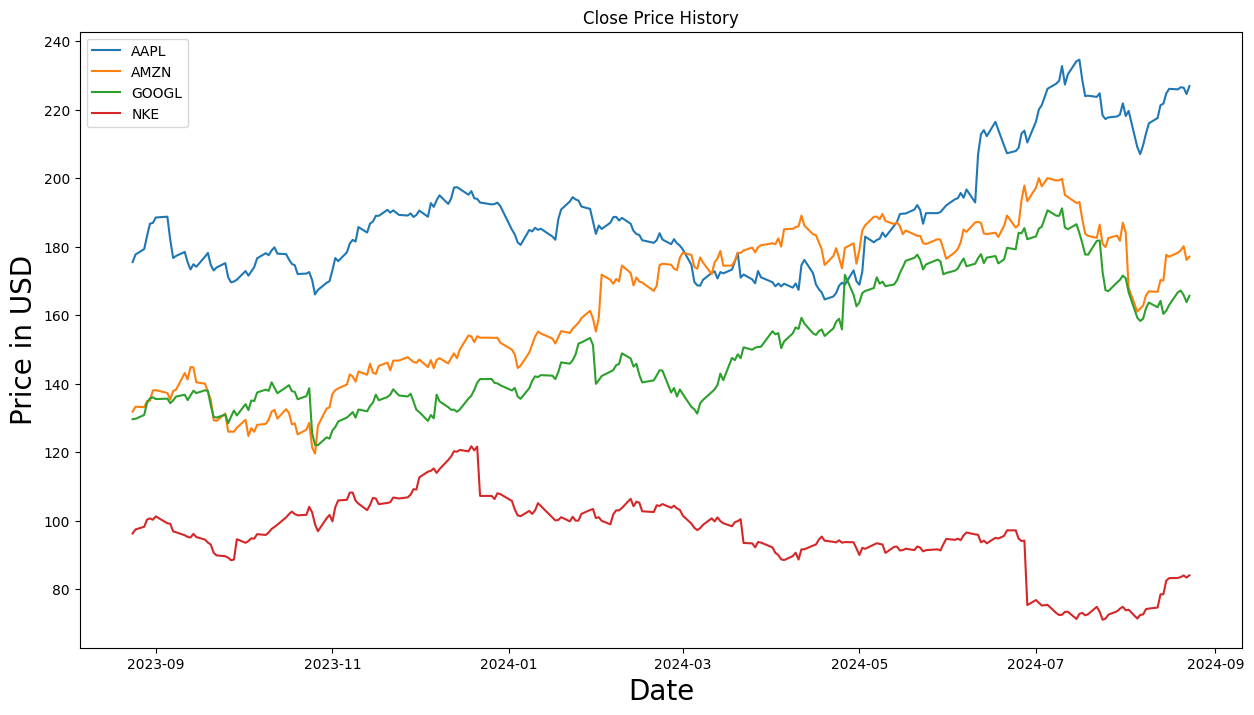

In [120]:
# Closing Price History
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df)
plt.title('Close Price History')
plt.xlabel('Date',fontsize =20)
plt.ylabel('Price in USD',fontsize = 20)
ax.legend(df.columns.values)
plt.show()

In [121]:
#Plot to understand the adjusted closing price of all the assets

In [122]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker      AAPL      AMZN     GOOGL       NKE
Ticker                                        
AAPL    0.000200  0.000097  0.000104  0.000081
AMZN    0.000097  0.000318  0.000179  0.000087
GOOGL   0.000104  0.000179  0.000309  0.000072
NKE     0.000081  0.000087  0.000072  0.000501

In [124]:
# Yearly returns for individual companies
ind_er = df.resample('YE').last().pct_change().mean()
ind_er

Ticker
AAPL     0.182677
AMZN     0.165197
GOOGL    0.186986
NKE     -0.220043
dtype: float64

In [125]:
#Above we find the yearly returns for all the assets choosen



In [126]:
# Volatility is given by the annual standard deviation. 
# We multiply by 252 because there are 252 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

Ticker
AAPL     0.224728
AMZN     0.283237
GOOGL    0.279013
NKE      0.355228
dtype: float64

In [127]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

Returns  Volatility
Ticker                      
AAPL    0.182677    0.224728
AMZN    0.165197    0.283237
GOOGL   0.186986    0.279013
NKE    -0.220043    0.355228

In [128]:
#Volatility and Returns for all the assets have been found above

In [129]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [131]:
#Number of portfolios = 10000

In [132]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [133]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [134]:
portfolios=pd.DataFrame(data)                        
portfolios.head() # Dataframe of the 100000 portfolios created

Returns  Volatility  AAPL weight  AMZN weight  GOOGL weight  NKE weight
0  0.001280    0.218945     0.331774     0.011486      0.204621    0.452119
1  0.088806    0.194347     0.379683     0.189898      0.203394    0.227025
2 -0.004311    0.236680     0.049578     0.475520      0.030899    0.444002
3  0.027447    0.210065     0.306989     0.035762      0.270452    0.386796
4  0.057381    0.210763     0.125617     0.270578      0.301202    0.302604

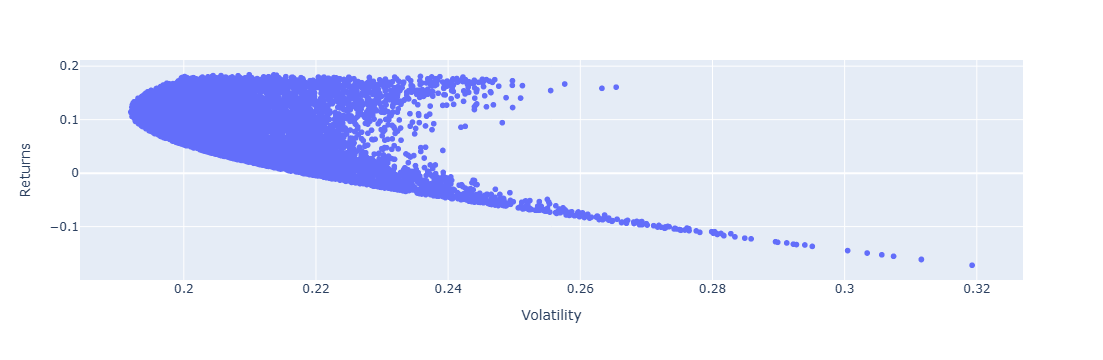

In [135]:
# Ploting efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns')

In [136]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.114390
Volatility      0.191993
AAPL weight     0.470822
AMZN weight     0.173913
GOOGL weight    0.191204
NKE weight      0.164060
Name: 2675, dtype: float64

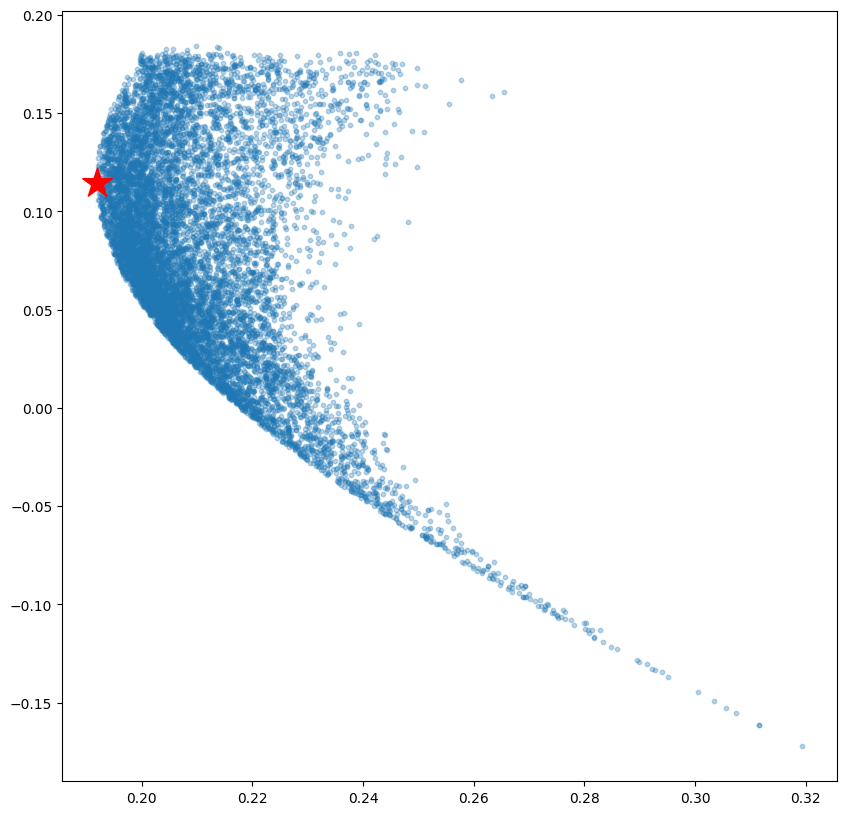

In [142]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port.iloc[1], min_vol_port.iloc[0], color='r', marker='*', s=500)

In [143]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.180578
Volatility      0.200128
AAPL weight     0.620021
AMZN weight     0.170781
GOOGL weight    0.209161
NKE weight      0.000036
Name: 2232, dtype: float64

In [144]:
#Above is the weights associated with each asset of portfolio

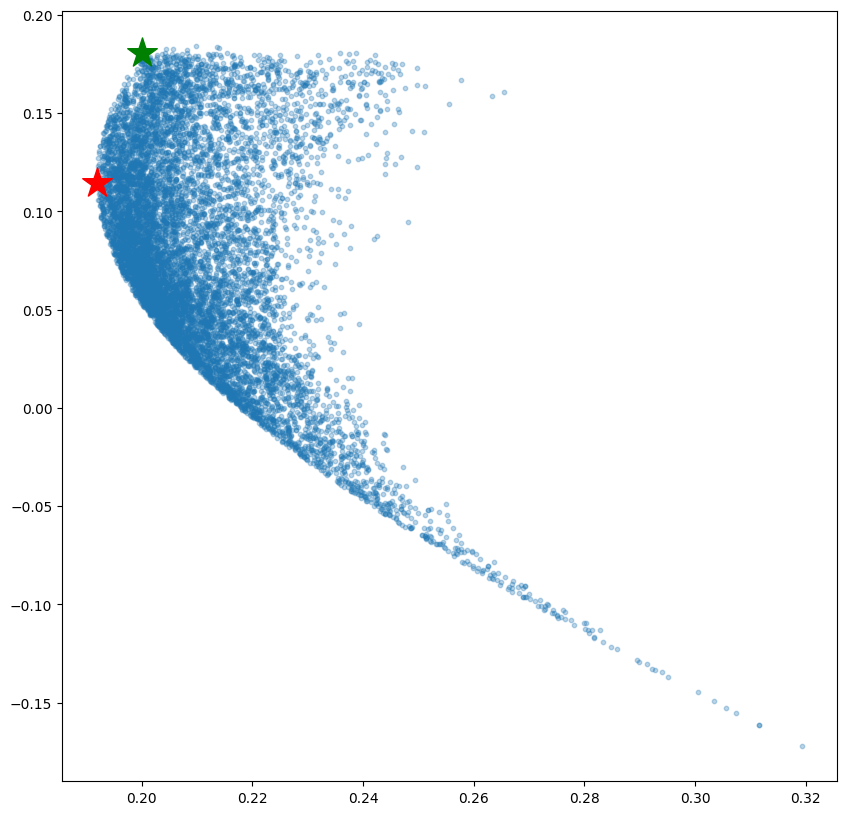

In [145]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port.iloc[1], min_vol_port.iloc[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port.iloc[1], optimal_risky_port.iloc[0], color='g', marker='*', s=500)

In [ ]:
#For the extras part refer the other juypter notebook, it includes an attempt approach via quantum gates. I have also added a file containing the recommendations and extras in the google drive